# Load Data In

In [1]:
train <- read.csv(file = 'C:/Users/Sierr/Desktop/Fall 2022/CIS 3920 textbook/Project/train.csv')
test <- read.csv(file = 'C:/Users/Sierr/Desktop/Fall 2022/CIS 3920 textbook/Project/test.csv')

In [2]:
# 0 mean dead
# 1 means alive

# Look at the first 6 rows of data for train and test

In [3]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [4]:
dim(train)

[1] 891  12

In [5]:
head(test)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [6]:
dim(test)

[1] 418  11

In [7]:
summary(train)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [8]:
table(train$Sex)


female   male 
   314    577 

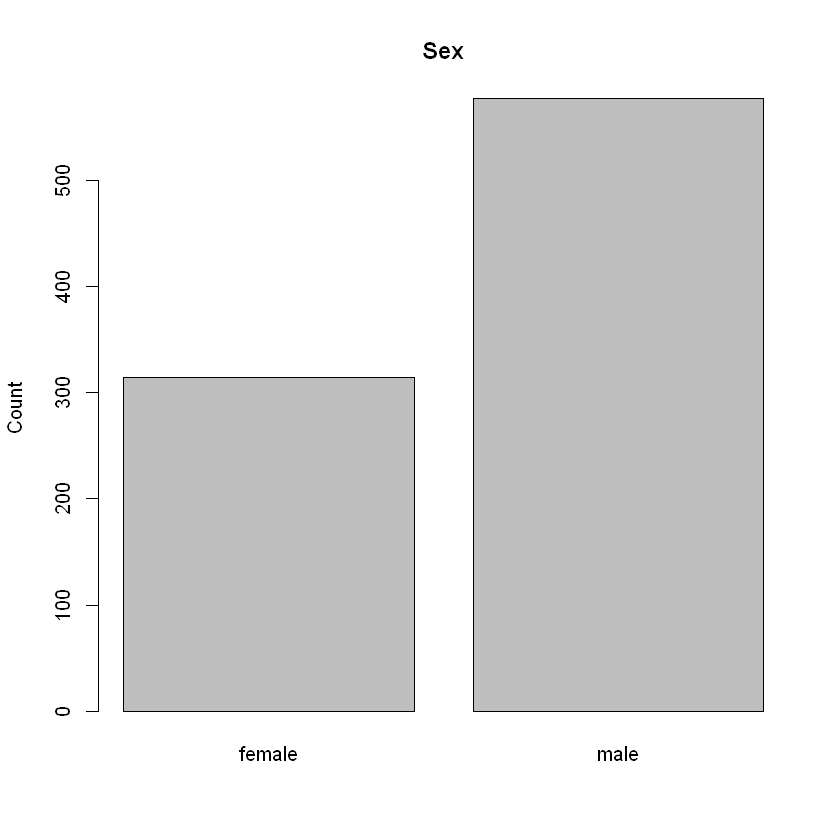

In [9]:
plot(train$Sex, ylab = 'Count', main = 'Sex')

In [10]:
table(train$Pclass)


  1   2   3 
216 184 491 

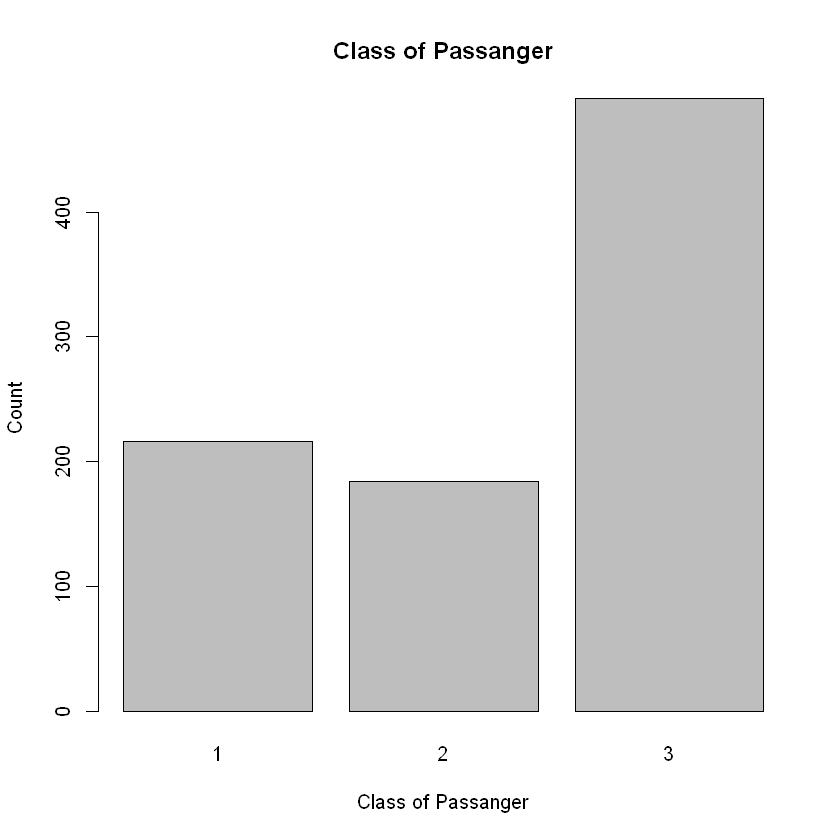

In [11]:
barplot(table(train$Pclass), xlab = 'Class of Passanger', ylab = 'Count', main = 'Class of Passanger')

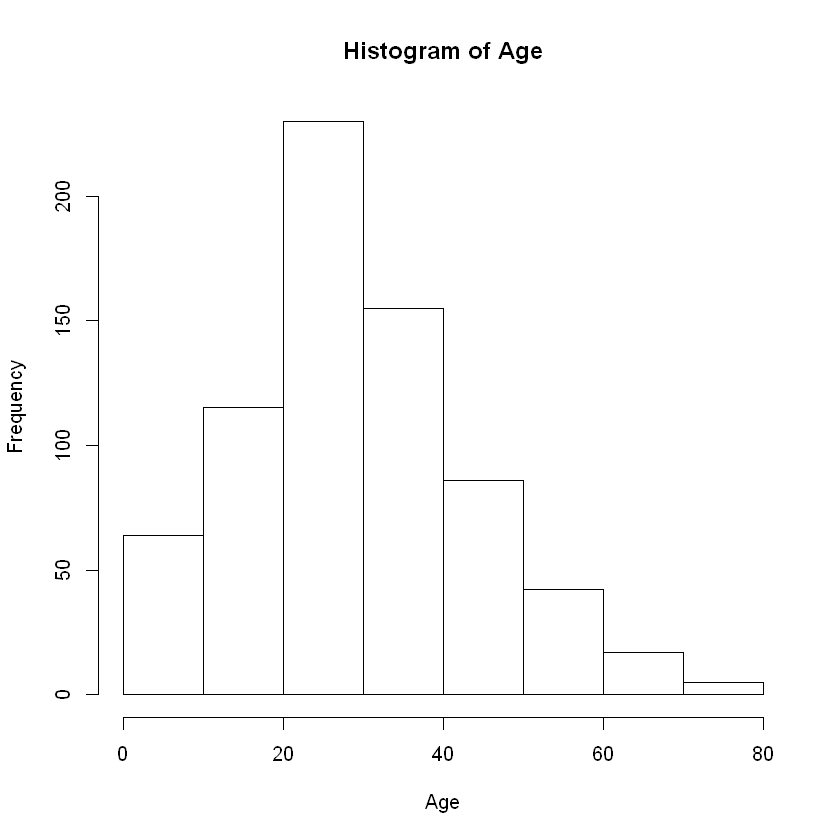

In [12]:
hist(train$Age, xlab = 'Age', main = 'Histogram of Age')

In [13]:
table(train$Survived)


  0   1 
549 342 

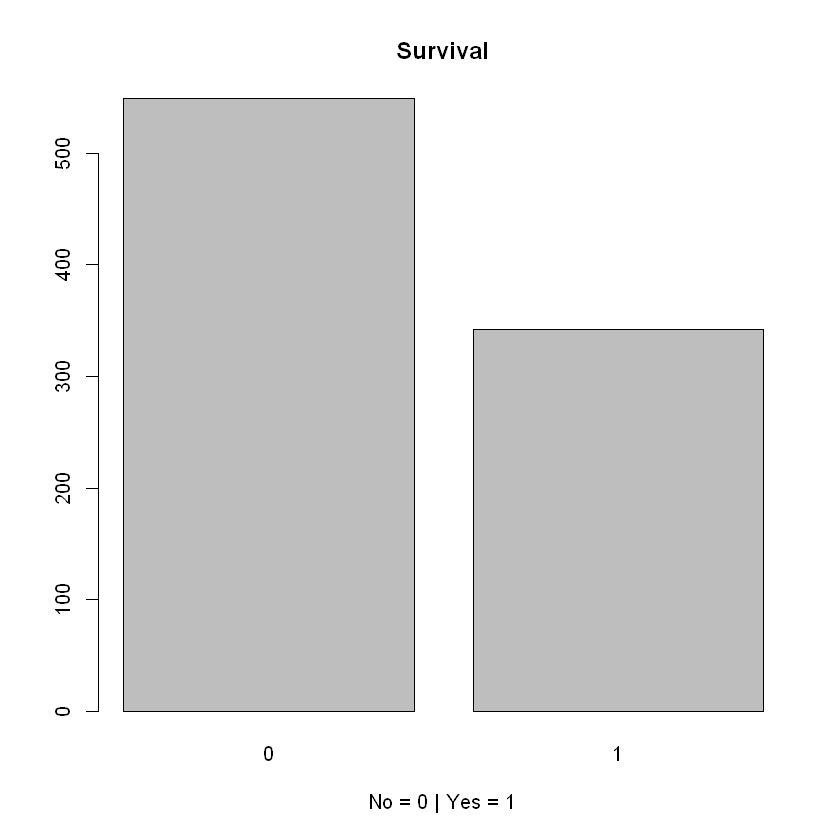

In [14]:
barplot(table(train$Survived), xlab = ' No = 0 | Yes = 1 ', main = 'Survival')

In [15]:
table(train$Sex, train$Survived)

        
           0   1
  female  81 233
  male   468 109

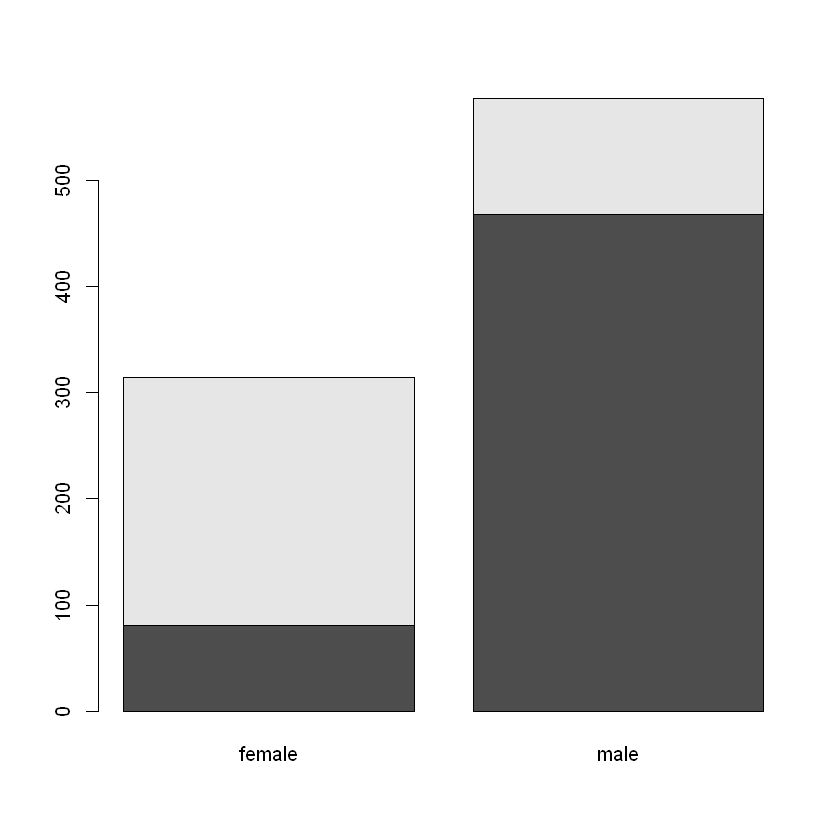

In [16]:
barplot(table(train$Survived, train$Sex))

In [17]:
table(train$Survived, train$Pclass)

   
      1   2   3
  0  80  97 372
  1 136  87 119

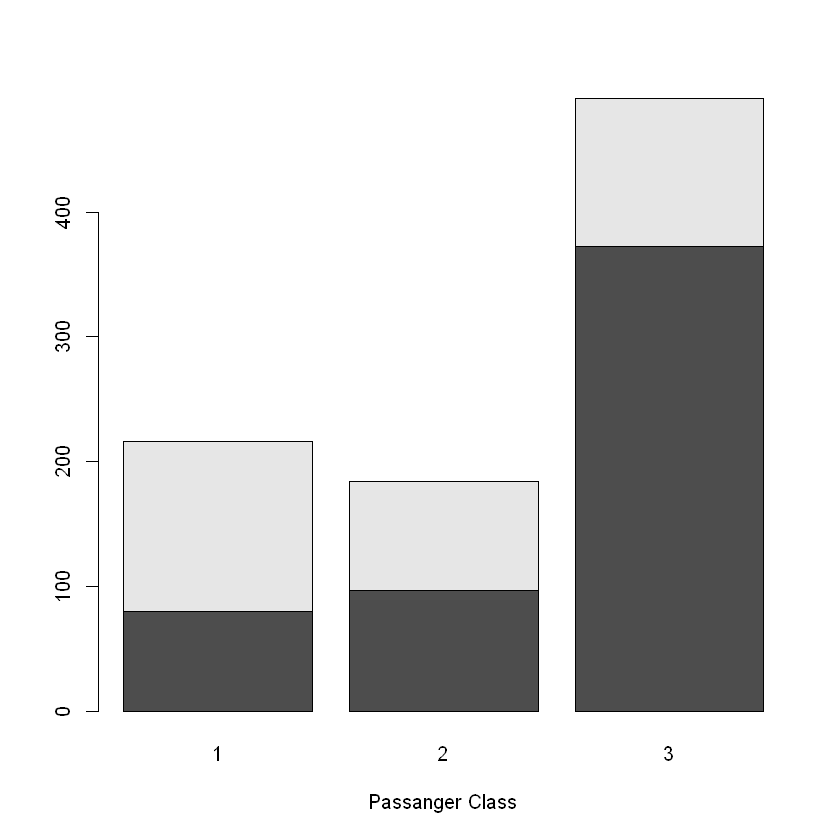

In [18]:
barplot(table(train$Survived, train$Pclass), xlab = 'Passanger Class')

# Decesion Tree

In [19]:
library(tree)

Warning message:
"package 'tree' was built under R version 3.6.3"


In [20]:
dec_tree <- tree(Survived ~ Sex + Pclass + Age, data = train)

In [21]:
summary(dec_tree)


Regression tree:
tree(formula = Survived ~ Sex + Pclass + Age, data = train)
Number of terminal nodes:  8 
Residual mean deviance:  0.1295 = 91.4 / 706 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9434 -0.1182 -0.1182  0.0000  0.0566  0.9167 

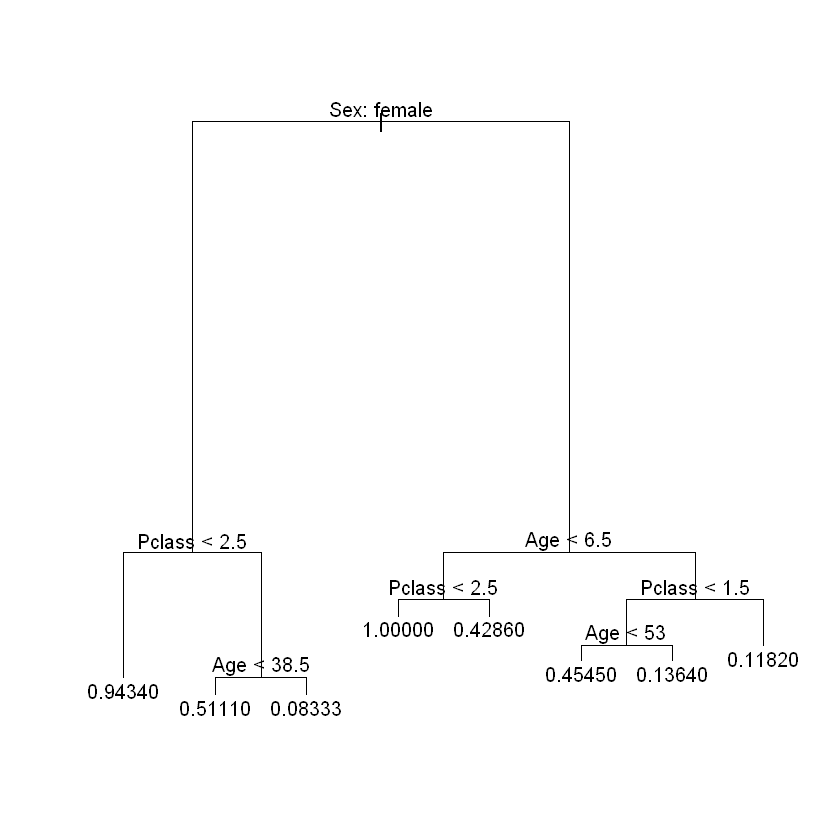

In [22]:
plot(dec_tree)
text(dec_tree, pretty = 0)
#left side means yes
#right side means no

In [23]:
print(dec_tree)

node), split, n, deviance, yval
      * denotes terminal node

 1) root 714 172.2000 0.40620  
   2) Sex: female 261  48.3100 0.75480  
     4) Pclass < 2.5 159   8.4910 0.94340 *
     5) Pclass > 2.5 102  25.3400 0.46080  
      10) Age < 38.5 90  22.4900 0.51110 *
      11) Age > 38.5 12   0.9167 0.08333 *
   3) Sex: male 453  73.9100 0.20530  
     6) Age < 6.5 24   5.3330 0.66670  
      12) Pclass < 2.5 10   0.0000 1.00000 *
      13) Pclass > 2.5 14   3.4290 0.42860 *
     7) Age > 6.5 429  63.1800 0.17950  
      14) Pclass < 1.5 99  23.4100 0.38380  
        28) Age < 53 77  19.0900 0.45450 *
        29) Age > 53 22   2.5910 0.13640 *
      15) Pclass > 1.5 330  34.3900 0.11820 *


# Logistic Regression

In [24]:
logistic_1 <- glm(Survived ~ Sex + Pclass + Age, family = 'binomial', data = train)

In [25]:
summary(logistic_1)


Call:
glm(formula = Survived ~ Sex + Pclass + Age, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7270  -0.6799  -0.3947   0.6483   2.4668  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.056006   0.502128  10.069  < 2e-16 ***
Sexmale     -2.522131   0.207283 -12.168  < 2e-16 ***
Pclass      -1.288545   0.139259  -9.253  < 2e-16 ***
Age         -0.036929   0.007628  -4.841 1.29e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 647.29  on 710  degrees of freedom
  (177 observations deleted due to missingness)
AIC: 655.29

Number of Fisher Scoring iterations: 5


In [26]:
#Beyonce
new <- data.frame(Sex = 'female', Pclass = 1, Age = 41)
predict(logistic_1, new, type = 'response')

1 
0.9049409

In [27]:
sexmale = 0 # 0 = female , 1 = male
pclass = 1
age = 41
value <- (exp(5.056006 - (2.522131)*(sexmale) - (1.288545)*(pclass) - 0.036929*(age))
          /(exp(5.056006 - (2.522131)*(sexmale) - (1.288545)*(pclass) - 0.036929*(age)) +1))
value

[1] 0.904941

In [28]:
#Calliou
new <- data.frame(Sex = 'male', Pclass = 1, Age = 4)
predict(logistic_1, new, type = 'response')

1 
0.7498128

In [29]:
sexmale = 1 # 0 = female , 1 = male
pclass = 1
age = 4
value <- (exp(5.056006 - (2.522131)*(sexmale) - (1.288545)*(pclass) - 0.036929*(age))
          /(exp(5.056006 - (2.522131)*(sexmale) - (1.288545)*(pclass) - 0.036929*(age)) +1))
value

[1] 0.7498128

In [30]:
library(pscl)

Warning message:
"package 'pscl' was built under R version 3.6.3"
Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis



In [31]:
pscl::pR2(logistic_1)['McFadden']

fitting null model for pseudo-r2


McFadden 
0.3288956

In [32]:
predict(logistic_1, test, type = 'response')

1          2          3          4          5          6          7 
0.06876537 0.36695719 0.08844155 0.08876217 0.59337437 0.13601783 0.52061342 
         8          9         10         11         12         13         14 
0.26827950 0.62846766 0.10839229         NA 0.38855161 0.94873366 0.08550924 
        15         16         17         18         19         20         21 
0.88409538 0.83098435 0.20821307 0.10839229 0.54817199 0.38427670 0.31307858 
        22         23         24         25         26         27         28 
0.15920957         NA 0.61534136 0.88025723 0.03999397 0.95050034 0.10315385 
        29         30         31         32         33         34         35 
0.43321167         NA 0.13128259 0.28302389 0.49292882         NA 0.53431093 
        36         37         38         39         40         41         42 
0.11764252         NA 0.60225303 0.09492031         NA 0.05885660         NA 
        43         44         45         46         47         48         49 
0.05489625 0.79754902 0.89145163 0.09492031 0.39736043         NA 0.82516203 
        50         51         52         53         54         55         56 
0.46528752 0.58880653 0.26109244 0.85072970 0.93897176         NA 0.15432817 
        57         58         59         60         61         62         63 
0.06759234 0.09492031         NA 0.91968069 0.12351541 0.22706768 0.11957276 
        64         65         66         67         68         69         70 
0.59337437 0.68249314         NA 0.62846766 0.37981499 0.52511154 0.82516203 
        71         72         73         74         75         76         77 
0.57543827 0.10839229 0.52982193 0.54806444 0.92236664 0.51128238         NA 
        78         79         80         81         82         83         84 
0.85022479 0.24029090 0.57543827 0.17460526 0.22637158 0.36257816         NA 
        85         86         87         88         89         90         91 
        NA         NA 0.54817199 0.62846766         NA 0.47076517 0.59337437 
        92         93         94         95         96         97         98 
        NA 0.94105394         NA 0.57983713 0.09492031 0.72329312 0.08296693 
        99        100        101        102        103        104        105 
0.61106489 0.07239845 0.89839466 0.26109244         NA 0.09179483 0.64554344 
       106        107        108        109        110        111        112 
0.08582024 0.10839229         NA         NA 0.32598486 0.17403377         NA 
       113        114        115        116        117        118        119 
0.91968069 0.62414614 0.80859910 0.11957276         NA 0.76013904 0.47898380 
       120        121        122        123        124        125        126 
0.80344628 0.88450162         NA 0.92236664 0.08582024         NA 0.63704875 
       127        128        129        130        131        132        133 
0.10487462         NA 0.16878910 0.09814070 0.07491798 0.32917746         NA 
       134        135        136        137        138        139        140 
        NA 0.05118790 0.09814070 0.09026703 0.26827950 0.58443428 0.05684402 
       141        142        143        144        145        146        147 
0.69446571 0.92749309 0.26750078 0.25403108 0.42416748 0.07751788         NA 
       148        149        150        151        152        153        154 
0.10487462         NA 0.24029090 0.94873366         NA 0.02749248 0.46528752 
       155        156        157        158        159        160        161 
0.14041624 0.09814070 0.93682096 0.58443428 0.42416748 0.55730127         NA 
       162        163        164        165        166        167        168 
0.16934690 0.82035605         NA 0.17403377 0.55730127 0.37115558 0.11957276 
       169        170        171        172        173        174        175 
        NA 0.59337437         NA 0.08876217 0.10145811         NA 0.05684402 
       176        177        178        179        180        181        182 
0.87269283 0.85072970 0.3210748

In [33]:
test$Survival_Rate <- c(predict(logistic_1, test, type = 'response'))

In [34]:
head(test)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival_Rate
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0.06876537
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,0.36695719
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,0.08844155
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,0.08876217
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,0.59337437
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,0.13601783


In [35]:
train$Survival_Rate <- c(predict(logistic_1, train, type = 'response'))

In [36]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival_Rate
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0.10487462
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,0.91405306
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,0.55730127
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0.92236664
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0.06759234
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,NA


In [37]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [38]:
library(factoextra)

Warning message:
"package 'factoextra' was built under R version 3.6.3"


ERROR: Error: package 'ggplot2' required by 'factoextra' could not be found
